# PYD BBVA

## Proyecto analítico Young Professional Data

## Ricardo Andrés Medina Aponte


#

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#GUARDAR purchase_per EN ARCHIVO csv
# pd.DataFrame(hist_trans, index=hist_trans.index, columns=['purchase_per']).to_csv('purchase_periods.csv', index_label='ID')
# from google.colab import files
# files.download('purchase_periods.csv')

In [5]:
fileId = drive.CreateFile({'id': '1VCGGzGtYpyMXVbQHFLZXvFr1_jYAtpG4'}) 
print (fileId['title']) 
fileId.GetContentFile('BASE_ID.txt')  # Save Drive file as a local file

BASE_ID.txt


In [6]:
fileId = drive.CreateFile({'id': '1NhU1PPcQRxTygVsP4c7hYCtEmE97LGK0'}) 
print (fileId['title']) 
fileId.GetContentFile('BASE_MOVIMIENTOS.txt')  # Save Drive file as a local file

BASE_MOVIMIENTOS.txt


In [7]:
fileId = drive.CreateFile({'id': '1XtIQws9XZqR5MMowrieI78n_aNjizXr4'}) 
print (fileId['title']) 
fileId.GetContentFile('BASE_MOVS.csv')  # Save Drive file as a local file

BASE_MOVS.csv


#CARGUE DE LAS BASES

##BASE_ID.txt: Información particular de cada cliente en la que se incluye alguna información demográfica. En particular se indica si el cliente se considera fugado.

In [8]:
#Cargue de la base de descripción de clientes
df = pd.read_csv('BASE_ID.txt', sep='\t')

#Primeros 5 registros
df.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,"1,00",sep301996,19300823,F,CASADO,otros,1.0,2.0
1,"2,00",may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,"3,00",dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,"4,00",ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,"5,00",jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


In [9]:
#Últimos 5 registros
df.tail()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
2495,"2496,00",dic142016,19790212,M,CASADO,Contrato fijo,NaN,NaN
2496,"2497,00",dic162016,19880424,MUJER,UNION LIBRE,CONTRATO TEMPORAL,NaN,NaN
2497,"2498,00",dic162016,19780726,mujer,SOLTERO,OTROS,1.0,4.0
2498,"2499,00",dic212016,19950630,M,SOLTERO,OTROS,1.0,3.0
2499,"2500,00",dic262016,19461201,M,CASADO,CONTRATO AUTONOMO,1.0,2.0


In [60]:
#Información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
CLIENTE_CC           2500 non-null int64
FECHA_ALTA           2500 non-null datetime64[ns]
FECHA_NACIMIENTO     2500 non-null object
SEXO                 2500 non-null category
ESTADO_CIVIL         2482 non-null category
SITUACION_LABORAL    2500 non-null category
fuga                 2500 non-null float64
MES_DE_FUGA          722 non-null float64
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 105.6+ KB


In [11]:
#Datos faltantes en cada variable
df.isnull().sum()

CLIENTE_CC              0
FECHA_ALTA              0
FECHA_NACIMIENTO        0
SEXO                    0
ESTADO_CIVIL           18
SITUACION_LABORAL       0
fuga                 1778
MES_DE_FUGA          1778
dtype: int64

###TRANSFORMACION DE VARIABLES

In [12]:
#VARIABLE CLIENTE_CC
df['CLIENTE_CC'] = df['CLIENTE_CC'].str.replace(',00','')

#Cambiamos la variable a entera
df['CLIENTE_CC'] = df['CLIENTE_CC'].astype('int') 
df.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
0,1,sep301996,19300823,F,CASADO,otros,1.0,2.0
1,2,may011986,19530630,HOMBRE,UNION LIBRE,Contrato fijo,NaN,NaN
2,3,dic011994,19540721,F,UNION LIBRE,OTROS,1.0,11.0
3,4,ago271997,19390503,M,CASADO,OTROS,NaN,NaN
4,5,jul211997,19311013,F,CASADO,contrato autonomo.,NaN,NaN


In [13]:
#Una descripción de las variables Demograficas categoricas:
df[['SEXO', 'ESTADO_CIVIL', 'SITUACION_LABORAL']].describe()

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL
count,2500,2482,2500
unique,12,6,10
top,M,SOLTERO,OTROS
freq,463,1032,608


Las variables de SEXO, ESTADO CIVIL y SITUACIÓN LABORAL tienen un volumen grande de categorias, por lo que es necesario explorar una a una.

In [14]:
#VARIABLE SEXO
df['SEXO'].value_counts()

M            463
mujer        306
F            284
HOMBRE       180
MUJER        178
Hombre       172
Mujer        168
femenino     160
FEMENINO     154
masculino    150
Masc.        149
varón        136
Name: SEXO, dtype: int64

Es necesario definir un único tipo de categoría para HOMBRE y MUJER.

In [15]:
df['SEXO'].unique()

array(['F', 'HOMBRE', 'M', 'Hombre', 'mujer', 'femenino', 'masculino',
       'FEMENINO', 'Mujer', 'varón', 'Masc.', 'MUJER'], dtype=object)

In [0]:
#Transformación de todas las categoria de MASCULINO
df.loc[df['SEXO'].isin(['HOMBRE', 'Hombre','masculino','Masc.','varón']),'SEXO']= 'M'

In [0]:
#Transformación de todas las categoria de MASCULINO
df.loc[df['SEXO'].isin(['mujer', 'MUJER','Mujer','femenino','FEMENINO']),'SEXO']='F'

In [18]:
#Finalmente quedamos con las categorias 'M' y 'F', Masculino y Femenino respectivamente.
df['SEXO'].value_counts()

F    1250
M    1250
Name: SEXO, dtype: int64

**VARIABLE ESTADO CIVIL**

In [19]:
#ESTADO CIVIL
df['ESTADO_CIVIL'].value_counts()

SOLTERO        1032
CASADO          799
UNION LIBRE     391
VIUDO           137
SEPARADO         92
DIVORCIADO       31
Name: ESTADO_CIVIL, dtype: int64

La variable ESTADO CIVIL parece no tener problemas en cuanto a sus categorias.

**VARIABLE SITUACION LABORAL**

In [20]:
#SITUACION_LABORAL
df['SITUACION_LABORAL'].value_counts()

OTROS                 608
CONTRATO FIJO         567
Contrato fijo         498
CONTRATO TEMPORAL     223
temporal              215
otros                 124
contrato autonomo.     96
CONTRATO AUTONOMO      87
SIN CLASIFICAR         42
 desconocido           40
Name: SITUACION_LABORAL, dtype: int64

In [21]:
df['SITUACION_LABORAL'].unique()

array(['otros', 'Contrato fijo', 'OTROS', 'contrato autonomo.',
       ' desconocido   ', 'CONTRATO AUTONOMO', 'CONTRATO FIJO',
       'CONTRATO TEMPORAL', 'temporal     ', 'SIN CLASIFICAR'],
      dtype=object)

La variable SITUACION LABORAL tiene varias maneras de denotar la misma categoria, por lo que es necesario unificarlas.

In [0]:
#Categoria contrato FIJO
df.loc[df['SITUACION_LABORAL'].isin(['CONTRATO FIJO', 'Contrato fijo']),'SITUACION_LABORAL']= 'FIJO'

In [0]:
#Categoria contrato OTROS
df.loc[df['SITUACION_LABORAL'].isin(['otros']),'SITUACION_LABORAL']= 'OTROS'

In [0]:
#Categoria contrato AUTÓNOMO
df.loc[df['SITUACION_LABORAL'].isin(['contrato autonomo.', 'CONTRATO AUTONOMO']),'SITUACION_LABORAL']= 'AUTONOMO'

In [0]:
#Categoria contrato TEMPORAL
df.loc[df['SITUACION_LABORAL'].isin(['CONTRATO TEMPORAL', 'temporal     ']),'SITUACION_LABORAL']= 'TEMPORAL'

In [0]:
#Categoria contrato DESCONOCIDO
df.loc[df['SITUACION_LABORAL'].isin(['SIN CLASIFICAR', ' desconocido   ']),'SITUACION_LABORAL']= 'DESCONOCIDO'

In [27]:
#Finalmente quedan unificadas las categorias
df['SITUACION_LABORAL'].value_counts()

FIJO           1065
OTROS           732
TEMPORAL        438
AUTONOMO        183
DESCONOCIDO      82
Name: SITUACION_LABORAL, dtype: int64

In [28]:
#Tipificación de las variables como CATEGORICAS
df[['SEXO', 'ESTADO_CIVIL', 'SITUACION_LABORAL']] = df[['SEXO', 'ESTADO_CIVIL', 'SITUACION_LABORAL']].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
CLIENTE_CC           2500 non-null int64
FECHA_ALTA           2500 non-null object
FECHA_NACIMIENTO     2500 non-null object
SEXO                 2500 non-null category
ESTADO_CIVIL         2482 non-null category
SITUACION_LABORAL    2500 non-null category
fuga                 722 non-null float64
MES_DE_FUGA          722 non-null float64
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 105.6+ KB


**VARIABLES FECHA ALTA Y FECHA NACIMIENTO**

In [0]:
#FECHAS

In [30]:
df[['FECHA_ALTA', 'FECHA_NACIMIENTO']].describe()

,FECHA_ALTA,FECHA_NACIMIENTO
count,2500,2500
unique,1660,2361
top,feb272002,0001-01-01
freq,190,13


In [31]:
df[['FECHA_ALTA', 'FECHA_NACIMIENTO']].head()

,FECHA_ALTA,FECHA_NACIMIENTO
0,sep301996,19300823
1,may011986,19530630
2,dic011994,19540721
3,ago271997,19390503
4,jul211997,19311013


Las variables presentan distintos tipos de formato.

In [0]:
#Se cambian los meses al idioma de máquina (ingles)
df['FECHA_ALTA'] = df['FECHA_ALTA'].str.replace('ene','jan')
df['FECHA_ALTA'] = df['FECHA_ALTA'].str.replace('abr','apr')
df['FECHA_ALTA'] = df['FECHA_ALTA'].str.replace('ago','aug')
df['FECHA_ALTA'] = df['FECHA_ALTA'].str.replace('dic','dec')

In [35]:
#Se tipifica en formato fecha
df['FECHA_ALTA'] = pd.to_datetime(df['FECHA_ALTA'], format='%b%d%Y')
df['FECHA_ALTA'].head()

0   1996-09-30
1   1986-05-01
2   1994-12-01
3   1997-08-27
4   1997-07-21
Name: FECHA_ALTA, dtype: datetime64[ns]

**VARIABLE FECHA NACIMIENTO**

In [36]:
df[['FECHA_NACIMIENTO']].describe()

,FECHA_NACIMIENTO
count,2500
unique,2361
top,0001-01-01
freq,13


La fecha de nacimiento se encuentra con un valor erroneo 0001-01-01 del cual hay 13 registros:

In [37]:
df.loc[df['FECHA_NACIMIENTO']=='0001-01-01'] 

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
124,125,1997-09-12,0001-01-01,F,NaN,DESCONOCIDO,NaN,NaN
149,150,1997-05-21,0001-01-01,M,NaN,TEMPORAL,NaN,NaN
677,678,2002-02-27,0001-01-01,M,NaN,DESCONOCIDO,NaN,NaN
687,688,2002-02-27,0001-01-01,F,NaN,DESCONOCIDO,1.0,3.0
747,748,2002-02-27,0001-01-01,F,NaN,OTROS,NaN,NaN
758,759,2002-02-27,0001-01-01,M,NaN,DESCONOCIDO,NaN,NaN
767,768,2002-02-27,0001-01-01,F,SOLTERO,DESCONOCIDO,NaN,NaN
781,782,2002-02-27,0001-01-01,F,NaN,DESCONOCIDO,NaN,NaN
787,788,1999-09-22,0001-01-01,F,NaN,OTROS,NaN,NaN
798,799,2002-02-27,0001-01-01,M,NaN,DESCONOCIDO,NaN,NaN


Estas fechas erroneas coinciden con valores NaN en Estado Civil, y la gran mayoría no presenta fuga. Además la fecha de alta para la gran mayoría es 2002-02-27. 

In [38]:
#valores perdidos en ESTADO CIVIL
df[df['ESTADO_CIVIL'].isnull()]

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
124,125,1997-09-12,0001-01-01,F,NaN,DESCONOCIDO,NaN,NaN
149,150,1997-05-21,0001-01-01,M,NaN,TEMPORAL,NaN,NaN
677,678,2002-02-27,0001-01-01,M,NaN,DESCONOCIDO,NaN,NaN
687,688,2002-02-27,0001-01-01,F,NaN,DESCONOCIDO,1.0,3.0
710,711,2005-09-07,20050722,M,NaN,OTROS,NaN,NaN
747,748,2002-02-27,0001-01-01,F,NaN,OTROS,NaN,NaN
755,756,2002-02-27,19300901,M,NaN,DESCONOCIDO,NaN,NaN
758,759,2002-02-27,0001-01-01,M,NaN,DESCONOCIDO,NaN,NaN
775,776,2002-02-27,19390922,F,NaN,DESCONOCIDO,NaN,NaN
781,782,2002-02-27,0001-01-01,F,NaN,DESCONOCIDO,NaN,NaN


In [39]:
# df[df['FECHA_NACIMIENTO']=='0001-01-01'] = pd.to_datetime(df[df['FECHA_NACIMIENTO']=='0001-01-01'], format='%Y%m%d')
df['FECHA_NACIMIENTO'].head()

0    19300823
1    19530630
2    19540721
3    19390503
4    19311013
Name: FECHA_NACIMIENTO, dtype: object

In [40]:
pd.to_datetime(df[df['FECHA_NACIMIENTO']!='0001-01-01'], format='%Y%m%d')

ValueError: ignored

**VARIABLE FUGA**

In [0]:
#Cambiamos los valores perdidos a 0.
df.loc[df['fuga'].isnull(),'fuga'] = 0

###DESCRIPTIVAS DE LAS VARIABLES:

Text(0.5, 1.0, 'CLIENTES FUGADOS')

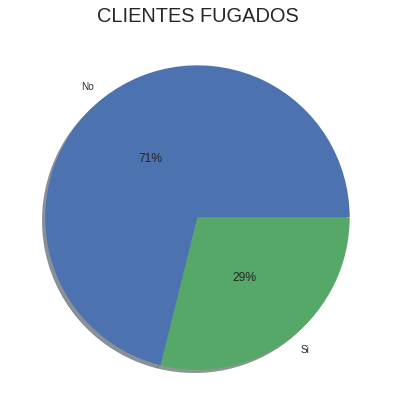

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(df['fuga'].value_counts(), labels=['No','Si'],autopct='%1.0f%%', 
        pctdistance=0.5, labeldistance=1.1,shadow=True)
ax.set_title('CLIENTES FUGADOS', fontsize=20)

Text(0.5, 1.0, 'SEXO')

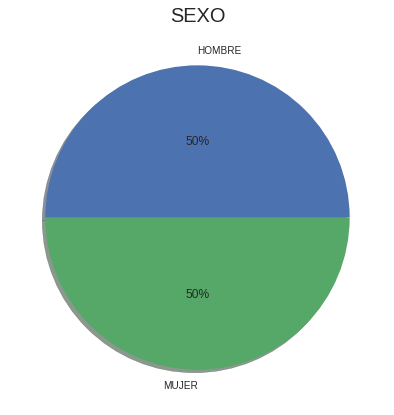

In [43]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(df['SEXO'].value_counts(), labels=['HOMBRE','MUJER'],autopct='%1.0f%%', 
        pctdistance=0.5, labeldistance=1.1,shadow=True)
ax.set_title('SEXO', fontsize=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'CANTIDAD')

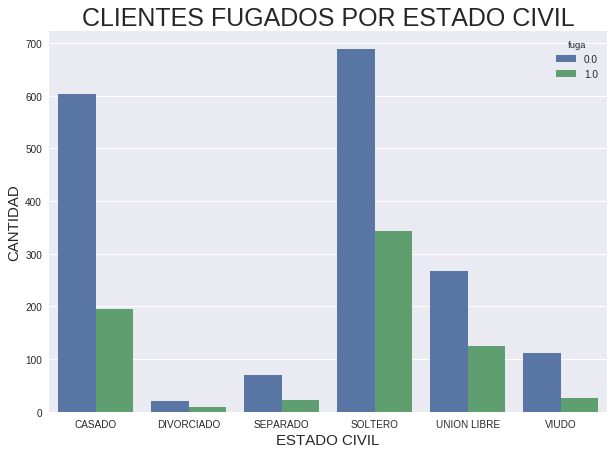

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot('ESTADO_CIVIL',hue='fuga',data=df[['fuga','ESTADO_CIVIL']])
ax.set_title('CLIENTES FUGADOS POR ESTADO CIVIL', fontsize=25)
# ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("ESTADO CIVIL", fontsize=15)
ax.set_ylabel("CANTIDAD", fontsize=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'CANTIDAD')

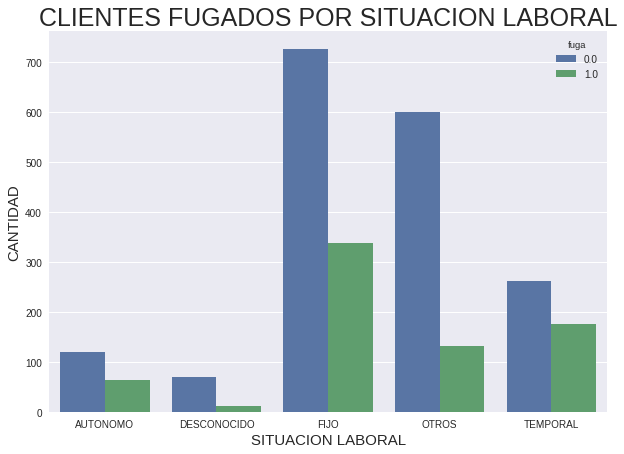

In [45]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot('SITUACION_LABORAL',hue='fuga',data=df[['fuga','SITUACION_LABORAL']])
ax.set_title('CLIENTES FUGADOS POR SITUACION LABORAL', fontsize=25)
# ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("SITUACION LABORAL", fontsize=15)
ax.set_ylabel("CANTIDAD", fontsize=15)

##BASE_MOVIMIENTOS.txt: Información asociada a montos y saldos de productos de los clientes a diferentes cortes con alguna información adicional.

In [54]:
#CARGUE DE LA BASE DE MOVIMIENTOS
movs = pd.read_csv('BASE_MOVIMIENTOS.txt', index_col=0)

ParserError: ignored

La base no puede ser cargada ya que tiene una estructura irregular, es necesario el cargue linea  a linea:

In [0]:
f = open('BASE_MOVIMIENTOS.txt')
contents = f.read()
lines = []
file_as_list = contents.splitlines()
for line in file_as_list:
    lines.append(line)

In [47]:
#Primera linea
lines[0].split()


['ID',
 'FECHA_INFORMACION',
 'SALDO_AHORROS',
 'SALDO_FONDOS',
 'SALDO_CREDITO1',
 'SALDO_CREDITO2',
 'SALDO_TARJETA',
 'MONTO_COMPRAS1',
 'MONTO_CAJERO1',
 'MONTO_COMPRAS2',
 'MONTO_CAJERO2',
 'MONTO_ABONOS_NOMINA',
 'INDICADOR_MORA',
 'SALDO_ACTIVO',
 'SALDO_PASIVO']

In [48]:
#Segunda linea
lines[1].split()

['00003',
 '01JUL2017:00:00:00',
 '3340',
 '0,00',
 '$',
 '876.047,06',
 '$',
 '0,00',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '876047,06',
 '3340']

Se evidencia que al realizar el SPLIT de cada linea, se tienen 2 datos mas por el formato de moneda '$'.

In [0]:
#Creamos la base con las columnas adicionales
movs = pd.DataFrame(columns = ['ID', 'FECHA_INFORMACION', 'SALDO_AHORROS', 'SALDO_FONDOS', 'pesos', 'SALDO_CREDITO1',
                            'pesos2', 'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1', 'MONTO_COMPRAS2',
                             'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA', 'INDICADOR_MORA', 'SALDO_ACTIVO', 'SALDO_PASIVO'] )

In [50]:
#Cargue de la base linea a linea
import datetime
a = datetime.datetime.now()
for i in range(1,len(lines)):
    movs.loc[i-1] = lines[i].split()

b = datetime.datetime.now()
delta = b - a
print(delta)

0:08:27.991210


In [51]:
#Primeros registros de la base de movimientos
movs.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,pesos,SALDO_CREDITO1,pesos2,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,00003,01JUL2017:00:00:00,3340,"0,00",$,"876.047,06",$,"0,00",0,0,0,0,0,0,0,"876047,06",3340
1,00171,01MAY2017:00:00:00,1.07013e+06,"0,00",$,"7.828.500,12",$,"0,00",0,0,0,0,460000,897220,0,"7828500,12","1070133,18"
2,00313,01OCT2017:00:00:00,0,"0,00",$,"0,00",$,"0,00",0,0,0,0,0,0,0,0,0
3,00644,01MAY2017:00:00:00,2204.88,"0,00",$,"8.863.156,75",$,"0,00",2.15317e+06,359023,0,8000,160000,748000,0,"11016329,89","2204,88"
4,01445,01DEC2016:00:00:00,692926,"0,00",$,"0,00",$,"0,00",0,0,0,0,0,606720,0,0,"692926,32"


In [52]:
movs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31440 entries, 0 to 31439
Data columns (total 17 columns):
ID                     31440 non-null object
FECHA_INFORMACION      31440 non-null object
SALDO_AHORROS          31440 non-null object
SALDO_FONDOS           31440 non-null object
pesos                  31440 non-null object
SALDO_CREDITO1         31440 non-null object
pesos2                 31440 non-null object
SALDO_CREDITO2         31440 non-null object
SALDO_TARJETA          31440 non-null object
MONTO_COMPRAS1         31440 non-null object
MONTO_CAJERO1          31440 non-null object
MONTO_COMPRAS2         31440 non-null object
MONTO_CAJERO2          31440 non-null object
MONTO_ABONOS_NOMINA    31440 non-null object
INDICADOR_MORA         31440 non-null object
SALDO_ACTIVO           31440 non-null object
SALDO_PASIVO           31440 non-null object
dtypes: object(17)
memory usage: 4.3+ MB


###TRANSFORMACION DE VARIABLES

In [0]:
#Convertir las variables ID e INDICADOR MORA a numericas 
movs['ID'] = movs ['ID'].convert_objects(convert_numeric=True)
movs['INDICADOR_MORA'] = movs ['INDICADOR_MORA'].convert_objects(convert_numeric=True)
# movs.dtypes

In [55]:
movs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31440 entries, 0 to 31439
Data columns (total 17 columns):
ID                     31440 non-null int64
FECHA_INFORMACION      31440 non-null object
SALDO_AHORROS          31440 non-null object
SALDO_FONDOS           31440 non-null object
pesos                  31440 non-null object
SALDO_CREDITO1         31440 non-null object
pesos2                 31440 non-null object
SALDO_CREDITO2         31440 non-null object
SALDO_TARJETA          31440 non-null object
MONTO_COMPRAS1         31440 non-null object
MONTO_CAJERO1          31440 non-null object
MONTO_COMPRAS2         31440 non-null object
MONTO_CAJERO2          31440 non-null object
MONTO_ABONOS_NOMINA    31440 non-null object
INDICADOR_MORA         31440 non-null int64
SALDO_ACTIVO           31440 non-null object
SALDO_PASIVO           31440 non-null object
dtypes: int64(2), object(15)
memory usage: 4.3+ MB


In [0]:
#Eliminar las columnas innecesarias
movs = movs.drop(columns=['pesos', 'pesos2'])

In [57]:
# movs[['SALDO_AHORROS','SALDO_FONDOS']].astype('float64')
movs[['SALDO_AHORROS', 'SALDO_FONDOS',
       'SALDO_CREDITO1', 'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1',
       'MONTO_CAJERO1', 'MONTO_COMPRAS2', 'MONTO_CAJERO2',
       'MONTO_ABONOS_NOMINA']].apply(pd.to_numeric, errors='coerce').head()

,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA
0,3340.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1070130.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,460000.0,897220.0
2,0.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2204.88,NaN,NaN,NaN,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0
4,692926.00,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,606720.0


Debido a que hay variables con formatos irregulares, al realizar la transformación se generan NaN. Es necesario corregir los elementos erroneos para la correcta transformación.

In [0]:
#CORRECCIÓN DE CARACTERES ERRONEOS
movs['SALDO_CREDITO1'] = movs['SALDO_CREDITO1'].str.replace('.','')
movs['SALDO_CREDITO1'] = movs['SALDO_CREDITO1'].str.replace(',','.')

movs['SALDO_FONDOS'] = movs['SALDO_FONDOS'].str.replace(',','.')

movs['SALDO_CREDITO2'] = movs['SALDO_CREDITO2'].str.replace('.','')
movs['SALDO_CREDITO2'] = movs['SALDO_CREDITO2'].str.replace(',','.')

movs['SALDO_ACTIVO'] = movs['SALDO_ACTIVO'].str.replace(',','.')

movs['SALDO_PASIVO'] = movs['SALDO_PASIVO'].str.replace(',','.')

In [0]:
#TRANSFORMACIÓN DE VARIABLES A NUMERICAS
movs[['SALDO_AHORROS', 'SALDO_FONDOS','SALDO_CREDITO1', 'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1',
       'MONTO_CAJERO1', 'MONTO_COMPRAS2', 'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA','SALDO_ACTIVO','SALDO_PASIVO']] = movs[['SALDO_AHORROS', 'SALDO_FONDOS', 
                                                                                           'SALDO_CREDITO1', 'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1',
                                                                                           'MONTO_CAJERO1', 'MONTO_COMPRAS2', 'MONTO_CAJERO2',
                                                                                           'MONTO_ABONOS_NOMINA','SALDO_ACTIVO','SALDO_PASIVO']].apply(pd.to_numeric)

In [65]:
movs.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,01JUL2017:00:00:00,3340.00,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.00
1,171,01MAY2017:00:00:00,1070130.00,0.0,7828500.12,0.0,0.0,0.0,0.0,0.0,460000.0,897220.0,0,7828500.12,1070133.18
2,313,01OCT2017:00:00:00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00
3,644,01MAY2017:00:00:00,2204.88,0.0,8863156.75,0.0,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,11016329.89,2204.88
4,1445,01DEC2016:00:00:00,692926.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606720.0,0,0.00,692926.32


In [66]:
movs.isnull().sum()

ID                     0
FECHA_INFORMACION      0
SALDO_AHORROS          0
SALDO_FONDOS           0
SALDO_CREDITO1         0
SALDO_CREDITO2         0
SALDO_TARJETA          0
MONTO_COMPRAS1         0
MONTO_CAJERO1          0
MONTO_COMPRAS2         0
MONTO_CAJERO2          0
MONTO_ABONOS_NOMINA    0
INDICADOR_MORA         0
SALDO_ACTIVO           0
SALDO_PASIVO           0
dtype: int64

In [0]:
movs.describe()
# movs.info()

,ID,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
count,31440.000000,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,3.144000e+04,31440.000000,3.144000e+04,3.144000e+04
mean,1245.013581,6.145143e+05,1.011476e+05,2.125163e+06,2.038797e+05,6.082164e+05,5.245179e+04,2.005084e+04,6.154962e+04,6.121321e+05,6.981118e+05,0.014377,2.937260e+06,7.315603e+05
std,719.758159,1.632780e+06,7.283073e+05,4.445635e+06,1.442148e+06,1.656331e+06,3.796909e+05,1.634780e+05,2.915263e+05,9.684137e+05,1.011727e+06,0.119039,4.840862e+06,1.785686e+06
min,1.000000,-1.738720e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.225200e+02
25%,622.000000,3.425000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.720000e+02
50%,1244.000000,7.545170e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.436170e+04
75%,1866.000000,4.480658e+05,0.000000e+00,1.342990e+06,0.000000e+00,1.914562e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+06,1.202605e+06,0.000000,4.184343e+06,5.413268e+05
max,2500.000000,9.329870e+07,9.780793e+06,6.700000e+07,1.756400e+07,2.075380e+07,1.449950e+07,8.990000e+06,1.077210e+07,1.888000e+07,2.800310e+07,1.000000,6.965860e+07,9.329867e+07


**VARIABLE FECHA INFORMACIÓN**

In [67]:
movs['FECHA_INFORMACION'].describe()

count                  31440
unique                    13
top       01DEC2016:00:00:00
freq                    2500
Name: FECHA_INFORMACION, dtype: object

In [68]:
random.sample(set(movs['FECHA_INFORMACION']), 10)

['01JUL2017:00:00:00',
 '01MAR2017:00:00:00',
 '01FEB2017:00:00:00',
 '01SEP2017:00:00:00',
 '01JAN2017:00:00:00',
 '01JUN2017:00:00:00',
 '01AUG2017:00:00:00',
 '01DEC2016:00:00:00',
 '01MAY2017:00:00:00',
 '01APR2017:00:00:00']

In [0]:
#Tranformar Fecha información
movs['FECHA_INFORMACION'] = movs['FECHA_INFORMACION'].str.replace(':00:00:00','')

In [70]:
# locale.setlocale(locale.LC_ALL, ("en_EN", "UTF-8"))
movs['FECHA_INFORMACION'] = pd.to_datetime(movs['FECHA_INFORMACION'], format='%d%b%Y')
movs['FECHA_INFORMACION'].head()

0   2017-07-01
1   2017-05-01
2   2017-10-01
3   2017-05-01
4   2016-12-01
Name: FECHA_INFORMACION, dtype: datetime64[ns]

In [71]:
movs.head()

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
0,3,2017-07-01,3340.00,0.0,876047.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,876047.06,3340.00
1,171,2017-05-01,1070130.00,0.0,7828500.12,0.0,0.0,0.0,0.0,0.0,460000.0,897220.0,0,7828500.12,1070133.18
2,313,2017-10-01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00
3,644,2017-05-01,2204.88,0.0,8863156.75,0.0,2153170.0,359023.0,0.0,8000.0,160000.0,748000.0,0,11016329.89,2204.88
4,1445,2016-12-01,692926.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,606720.0,0,0.00,692926.32


In [72]:
movs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31440 entries, 0 to 31439
Data columns (total 15 columns):
ID                     31440 non-null int64
FECHA_INFORMACION      31440 non-null datetime64[ns]
SALDO_AHORROS          31440 non-null float64
SALDO_FONDOS           31440 non-null float64
SALDO_CREDITO1         31440 non-null float64
SALDO_CREDITO2         31440 non-null float64
SALDO_TARJETA          31440 non-null float64
MONTO_COMPRAS1         31440 non-null float64
MONTO_CAJERO1          31440 non-null float64
MONTO_COMPRAS2         31440 non-null float64
MONTO_CAJERO2          31440 non-null float64
MONTO_ABONOS_NOMINA    31440 non-null float64
INDICADOR_MORA         31440 non-null int64
SALDO_ACTIVO           31440 non-null float64
SALDO_PASIVO           31440 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(2)
memory usage: 3.8 MB


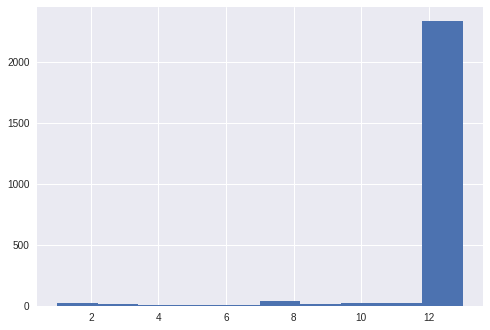

In [0]:
movs['ID'].value_counts().hist()

En la gran mayoria, por cada cliente hay 13 transacciones. 

In [0]:
#Clientes con 13 movimientos
frec = movs['ID'].value_counts()
frec[frec==13].count()

2297

In [0]:
#Ejemplo de llos movimientos de un cliente:
c = 60
movs[movs['ID']==c].sort_values(['FECHA_INFORMACION'])
# df[df['CLIENTE_CC']==3]

,ID,FECHA_INFORMACION,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,INDICADOR_MORA,SALDO_ACTIVO,SALDO_PASIVO
26162,60,2016-12-01,58.9,0.0,0.0,0.0,2083900.0,0.0,0.0,0.0,0.0,0.0,0,2083898.87,58.9
21358,60,2017-01-01,58.9,0.0,0.0,0.0,1958490.0,0.0,0.0,0.0,0.0,0.0,0,1958488.97,58.9
18300,60,2017-02-01,58.9,0.0,0.0,0.0,1940130.0,0.0,0.0,0.0,0.0,0.0,0,1940129.57,58.9
10843,60,2017-03-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,0,1951266.29,58.9
26194,60,2017-04-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,0,1951266.29,58.9
743,60,2017-05-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,1,1951266.29,58.9
9126,60,2017-06-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,1,1951266.29,58.9
17558,60,2017-07-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,1,1951266.29,58.9
12421,60,2017-08-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,1,1951266.29,58.9
20060,60,2017-09-01,58.9,0.0,0.0,0.0,1951270.0,0.0,0.0,0.0,0.0,0.0,1,1951266.29,58.9


In [0]:
#Descricion del cliente
df[df['CLIENTE_CC']==c]

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA
59,60,1997-08-28,19680531,M,CASADO,TEMPORAL,1.0,5.0


###CREACIÓN DE VARIABLES 

**VARIABLE ANTIGUEDAD**

In [73]:
#Creación de la variable ANTIGUEDAD en días de acuerdo a su fecha de vinculación como cliente 
from datetime import datetime, timedelta
df['ANTIGUEDAD'] = datetime.strptime(str('2016-12-01'), '%Y-%m-%d') - df['FECHA_ALTA']
df['ANTIGUEDAD'] = df['ANTIGUEDAD'] / timedelta(days=1)
df.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,ANTIGUEDAD
0,1,1996-09-30,19300823,F,CASADO,OTROS,1.0,2.0,7367.0
1,2,1986-05-01,19530630,M,UNION LIBRE,FIJO,0.0,NaN,11172.0
2,3,1994-12-01,19540721,F,UNION LIBRE,OTROS,1.0,11.0,8036.0
3,4,1997-08-27,19390503,M,CASADO,OTROS,0.0,NaN,7036.0
4,5,1997-07-21,19311013,F,CASADO,AUTONOMO,0.0,NaN,7073.0


Con el fin de realizar un modelo de predicción de clientes se generan las siguientes variables a partir de los movimientos de cada cliente:

In [0]:
trans = pd.DataFrame(columns=['CLIENTE', 'SALDO_AHORROS', 'SALDO_FONDOS', 'SALDO_CREDITO1', 'SALDO_CREDITO2', 
                              'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1', 'MONTO_COMPRAS2',
                              'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA', 'SALDO_ACTIVO', 'SALDO_PASIVO']) 

In [0]:
#Por cada cliente se generan las variables a partir de estadisticas de las transacciones
for i in df.index:
  temp = []
  temp = movs[movs['ID']==df.loc[i,'CLIENTE_CC']].sort_values(['FECHA_INFORMACION'])
  trans.loc[i,'CLIENTE'] = df.loc[i,'CLIENTE_CC']
  trans.loc[i,'SALDO_AHORROS'] = temp['SALDO_AHORROS'].mean()
  trans.loc[i,'SALDO_FONDOS'] = temp['SALDO_FONDOS'].mean()
  trans.loc[i,'SALDO_CREDITO1'] = temp['SALDO_CREDITO1'].mean()
  trans.loc[i,'SALDO_CREDITO2'] = temp['SALDO_CREDITO2'].mean()
  trans.loc[i,'SALDO_TARJETA'] = temp['SALDO_TARJETA'].mean()
  trans.loc[i,'MONTO_COMPRAS1'] = temp['MONTO_COMPRAS1'].sum()
  trans.loc[i,'MONTO_CAJERO1'] = temp['MONTO_CAJERO1'].sum()
  trans.loc[i,'MONTO_COMPRAS2'] = temp['MONTO_COMPRAS2'].sum()
  trans.loc[i,'MONTO_CAJERO2'] = temp['MONTO_CAJERO2'].sum()
  trans.loc[i,'MONTO_ABONOS_NOMINA'] = temp['MONTO_ABONOS_NOMINA'].mean()
  trans.loc[i,'SALDO_ACTIVO'] = temp['SALDO_ACTIVO'].mean()
  trans.loc[i,'SALDO_PASIVO'] = temp['SALDO_PASIVO'].mean()

In [76]:
trans.head()

,CLIENTE,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
0,1,5620.1,0,0,0,0,0,0,0,0,0,0,5620.1
1,2,0,0,4.71526e+06,0,836644,0,0,0,0,0,5.5519e+06,0
2,3,3340,0,1.18444e+06,0,0,0,0,0,0,0,1.18444e+06,3340
3,4,620654,0,0,0,0,0,0,5.7358e+06,2.267e+07,1.20582e+06,0,620654
4,5,175403,0,0,0,0,0,0,0,0,0,0,419842


In [77]:
trans.tail()

,CLIENTE,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
2495,2496,63214.1,0,1.596e+06,0,410892,1.50603e+06,0,44900,300000,0,2.00689e+06,63214.1
2496,2497,341524,0,7.40244e+06,0,0,0,0,109920,1.12e+06,0,7.40244e+06,341523
2497,2498,274350,0,0,0,0,0,0,620401,2.4e+06,0,0,274350
2498,2499,52182.8,0,0,0,0,0,0,0,0,0,0,52182.7
2499,2500,5.92453e+06,0,0,0,0,0,0,0,0,0,0,5.92453e+06


In [0]:
#transformacion de las variables a tipo numericas
trans[['SALDO_AHORROS', 'SALDO_FONDOS', 'SALDO_CREDITO1',
       'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1',
       'MONTO_COMPRAS2', 'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA',
       'SALDO_ACTIVO', 'SALDO_PASIVO']] = trans[['SALDO_AHORROS', 'SALDO_FONDOS', 'SALDO_CREDITO1',
       'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1',
       'MONTO_COMPRAS2', 'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA',
       'SALDO_ACTIVO', 'SALDO_PASIVO']].apply(pd.to_numeric)

In [79]:
trans.info()
trans.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 13 columns):
CLIENTE                2500 non-null object
SALDO_AHORROS          2500 non-null float64
SALDO_FONDOS           2500 non-null float64
SALDO_CREDITO1         2500 non-null float64
SALDO_CREDITO2         2500 non-null float64
SALDO_TARJETA          2500 non-null float64
MONTO_COMPRAS1         2500 non-null float64
MONTO_CAJERO1          2500 non-null float64
MONTO_COMPRAS2         2500 non-null float64
MONTO_CAJERO2          2500 non-null float64
MONTO_ABONOS_NOMINA    2500 non-null float64
SALDO_ACTIVO           2500 non-null float64
SALDO_PASIVO           2500 non-null float64
dtypes: float64(12), object(1)
memory usage: 353.4+ KB


Index(['CLIENTE', 'SALDO_AHORROS', 'SALDO_FONDOS', 'SALDO_CREDITO1',
       'SALDO_CREDITO2', 'SALDO_TARJETA', 'MONTO_COMPRAS1', 'MONTO_CAJERO1',
       'MONTO_COMPRAS2', 'MONTO_CAJERO2', 'MONTO_ABONOS_NOMINA',
       'SALDO_ACTIVO', 'SALDO_PASIVO'],
      dtype='object')

**BASE COMPLETA DE CLIENTES:**

In [80]:
#Se crea una única base con todas las variables, tanto demograficas, como de sus transacciones
clientes = pd.merge(df, trans, left_on=['CLIENTE_CC'], right_on=['CLIENTE'], how='left', sort=False)
clientes.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,ANTIGUEDAD,CLIENTE,...,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
0,1,1996-09-30,19300823,F,CASADO,OTROS,1.0,2.0,7367.0,1,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,5620.096923
1,2,1986-05-01,19530630,M,UNION LIBRE,FIJO,0.0,NaN,11172.0,2,...,4.715257e+06,0.0,836643.769231,0.0,0.0,0.0,0.0,0.000000e+00,5.551901e+06,0.000000
2,3,1994-12-01,19540721,F,UNION LIBRE,OTROS,1.0,11.0,8036.0,3,...,1.184444e+06,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,1.184444e+06,3340.000000
3,4,1997-08-27,19390503,M,CASADO,OTROS,0.0,NaN,7036.0,4,...,0.000000e+00,0.0,0.000000,0.0,0.0,5735800.0,22670000.0,1.205821e+06,0.000000e+00,620654.273846
4,5,1997-07-21,19311013,F,CASADO,AUTONOMO,0.0,NaN,7073.0,5,...,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,419841.855385


In [81]:
#se eliminan variables que no sirven para el modelo
clientes.drop(['fuga', 'CLIENTE_CC','FECHA_ALTA','FECHA_NACIMIENTO'], axis=1).head()

,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,MES_DE_FUGA,ANTIGUEDAD,CLIENTE,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,MONTO_COMPRAS2,MONTO_CAJERO2,MONTO_ABONOS_NOMINA,SALDO_ACTIVO,SALDO_PASIVO
0,F,CASADO,OTROS,2.0,7367.0,1,5620.096923,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,5620.096923
1,M,UNION LIBRE,FIJO,NaN,11172.0,2,0.000000,0.0,4.715257e+06,0.0,836643.769231,0.0,0.0,0.0,0.0,0.000000e+00,5.551901e+06,0.000000
2,F,UNION LIBRE,OTROS,11.0,8036.0,3,3340.000000,0.0,1.184444e+06,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,1.184444e+06,3340.000000
3,M,CASADO,OTROS,NaN,7036.0,4,620654.307692,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,5735800.0,22670000.0,1.205821e+06,0.000000e+00,620654.273846
4,F,CASADO,AUTONOMO,NaN,7073.0,5,175402.692308,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,419841.855385


**CREACION DE DUMMIES DE LAS VARIABLES CATEGORICAS**

In [0]:
#VARIABLE SEXO
clientes['SEXO'].replace(['F','M'],['1','0'],inplace=True)
clientes['SEXO'] = clientes['SEXO'].apply(pd.to_numeric)

In [83]:
#Agrego las variables DUMMIES a la base
clientes2 = pd.concat([clientes, pd.get_dummies(clientes[['ESTADO_CIVIL','SITUACION_LABORAL']])], axis=1)
clientes2.head()

,CLIENTE_CC,FECHA_ALTA,FECHA_NACIMIENTO,SEXO,ESTADO_CIVIL,SITUACION_LABORAL,fuga,MES_DE_FUGA,ANTIGUEDAD,CLIENTE,...,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,SITUACION_LABORAL_AUTONOMO,SITUACION_LABORAL_DESCONOCIDO,SITUACION_LABORAL_FIJO,SITUACION_LABORAL_OTROS,SITUACION_LABORAL_TEMPORAL
0,1,1996-09-30,19300823,1,CASADO,OTROS,1.0,2.0,7367.0,1,...,0,0,0,0,0,0,0,0,1,0
1,2,1986-05-01,19530630,0,UNION LIBRE,FIJO,0.0,NaN,11172.0,2,...,0,0,0,1,0,0,0,1,0,0
2,3,1994-12-01,19540721,1,UNION LIBRE,OTROS,1.0,11.0,8036.0,3,...,0,0,0,1,0,0,0,0,1,0
3,4,1997-08-27,19390503,0,CASADO,OTROS,0.0,NaN,7036.0,4,...,0,0,0,0,0,0,0,0,1,0
4,5,1997-07-21,19311013,1,CASADO,AUTONOMO,0.0,NaN,7073.0,5,...,0,0,0,0,0,1,0,0,0,0


In [84]:
#Elimino las variables categoricas
cl = clientes2.drop(['CLIENTE_CC','FECHA_ALTA','FECHA_NACIMIENTO','ESTADO_CIVIL','SITUACION_LABORAL','MES_DE_FUGA','CLIENTE'], axis=1)
cl.head()

,SEXO,fuga,ANTIGUEDAD,SALDO_AHORROS,SALDO_FONDOS,SALDO_CREDITO1,SALDO_CREDITO2,SALDO_TARJETA,MONTO_COMPRAS1,MONTO_CAJERO1,...,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,SITUACION_LABORAL_AUTONOMO,SITUACION_LABORAL_DESCONOCIDO,SITUACION_LABORAL_FIJO,SITUACION_LABORAL_OTROS,SITUACION_LABORAL_TEMPORAL
0,1,1.0,7367.0,5620.096923,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,11172.0,0.000000,0.0,4.715257e+06,0.0,836643.769231,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,1,1.0,8036.0,3340.000000,0.0,1.184444e+06,0.0,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,0.0,7036.0,620654.307692,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1,0.0,7073.0,175402.692308,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 26 columns):
SEXO                             2500 non-null int64
fuga                             2500 non-null float64
ANTIGUEDAD                       2500 non-null float64
SALDO_AHORROS                    2500 non-null float64
SALDO_FONDOS                     2500 non-null float64
SALDO_CREDITO1                   2500 non-null float64
SALDO_CREDITO2                   2500 non-null float64
SALDO_TARJETA                    2500 non-null float64
MONTO_COMPRAS1                   2500 non-null float64
MONTO_CAJERO1                    2500 non-null float64
MONTO_COMPRAS2                   2500 non-null float64
MONTO_CAJERO2                    2500 non-null float64
MONTO_ABONOS_NOMINA              2500 non-null float64
SALDO_ACTIVO                     2500 non-null float64
SALDO_PASIVO                     2500 non-null float64
ESTADO_CIVIL_CASADO              2500 non-null uint8
ESTADO_CIVIL_DIVO

###ANÁLISIS DE VARIABLES:

Para analizar las variables se realiza un modelo de** RANDOM FOREST** con el cual tendremos un valor relativo de importancia de cada variable:

In [0]:
#MODELO RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
rnd_clf.fit(cl.drop(['fuga'], axis=1), cl['fuga'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

**IMPORTANCIA RELATIVA DE LAS VARIABLES:**

In [0]:
for name, importance in zip(cl.drop(['fuga'], axis=1).columns, rnd_clf.feature_importances_):
  print(name, "=", importance)

SEXO = 0.015091369176382256
ANTIGUEDAD = 0.09153818996849337
SALDO_AHORROS = 0.1107920023137841
SALDO_FONDOS = 0.01243912933260683
SALDO_CREDITO1 = 0.06585459711206545
SALDO_CREDITO2 = 0.008914268270799301
SALDO_TARJETA = 0.04396051397668648
MONTO_COMPRAS1 = 0.03389243990404536
MONTO_CAJERO1 = 0.01925832425971412
MONTO_COMPRAS2 = 0.033635131078156105
MONTO_CAJERO2 = 0.07759835554950813
MONTO_ABONOS_NOMINA = 0.12407556298702815
SALDO_ACTIVO = 0.13957523014118917
SALDO_PASIVO = 0.13591791577654377
ESTADO_CIVIL_CASADO = 0.0107295932104169
ESTADO_CIVIL_DIVORCIADO = 0.003550806053138717
ESTADO_CIVIL_SEPARADO = 0.00477824792703403
ESTADO_CIVIL_SOLTERO = 0.011050647710284562
ESTADO_CIVIL_UNION LIBRE = 0.008045833954823696
ESTADO_CIVIL_VIUDO = 0.003621930138653054
SITUACION_LABORAL_AUTONOMO = 0.005909806822000896
SITUACION_LABORAL_DESCONOCIDO = 0.004452671643434912
SITUACION_LABORAL_FIJO = 0.010861715660983238
SITUACION_LABORAL_OTROS = 0.015265119384937001
SITUACION_LABORAL_TEMPORAL = 0.009190

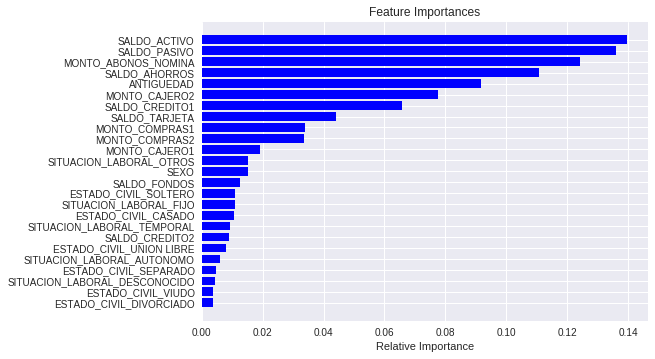

In [0]:
features = cl.drop(['fuga'], axis=1).columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Segun el modelo, las variables más importantes, o las que mejor pueden explicar la variabilidad de la FUGA de los clientes, son 
- SALDO ACTIVO
- SALDO PASIVO
- MONTO ABONOS DE NOMINA
- SALDO AHORROS
- ANTIGUEDAD

**DESCRIPTIVAS DE LAS 5 VARIABLES MÁS IMPORTANTES:**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'PROMEDIO SALDO ACTIVO')

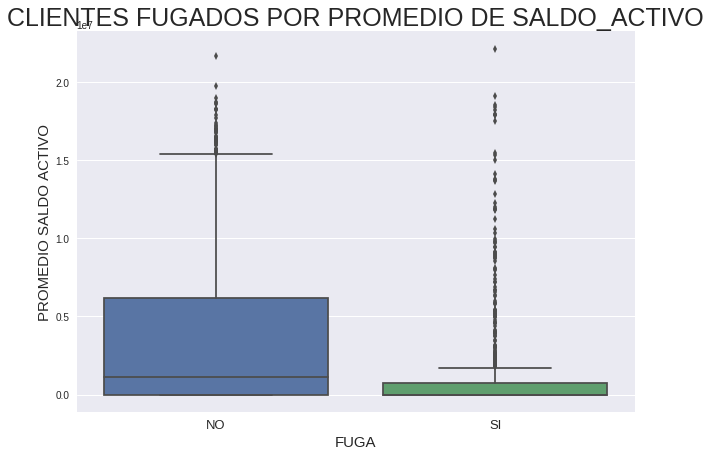

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="fuga", y="SALDO_ACTIVO", data=cl)
ax.set_title('CLIENTES FUGADOS POR PROMEDIO DE SALDO_ACTIVO', fontsize=25)
ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("FUGA", fontsize=15)
ax.set_ylabel("PROMEDIO SALDO ACTIVO", fontsize=15)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'PROMEDIO SALDO PASIVO')

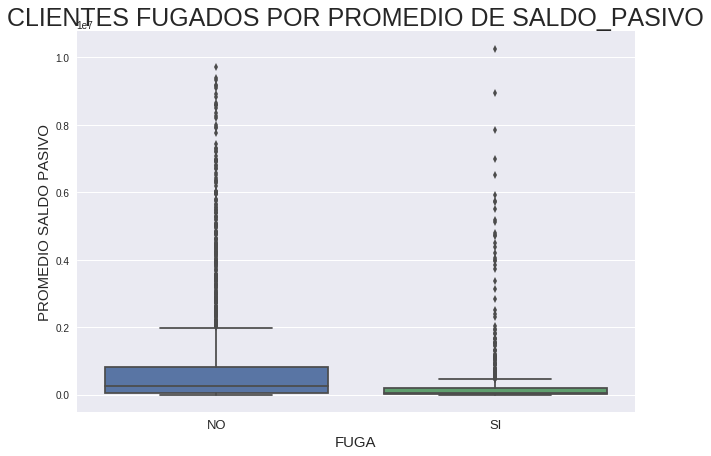

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="fuga", y="SALDO_PASIVO", data=cl)
ax.set_title('CLIENTES FUGADOS POR PROMEDIO DE SALDO_PASIVO', fontsize=25)
ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("FUGA", fontsize=15)
ax.set_ylabel("PROMEDIO SALDO PASIVO", fontsize=15)

Como se evidencia en las anteriores gráficas, los clientes que mayormente tienden a fugarse, son los que tienen saldos activos y pasivos BAJOS.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'PROMEDIO MONTO_ABONOS_NOMINA')

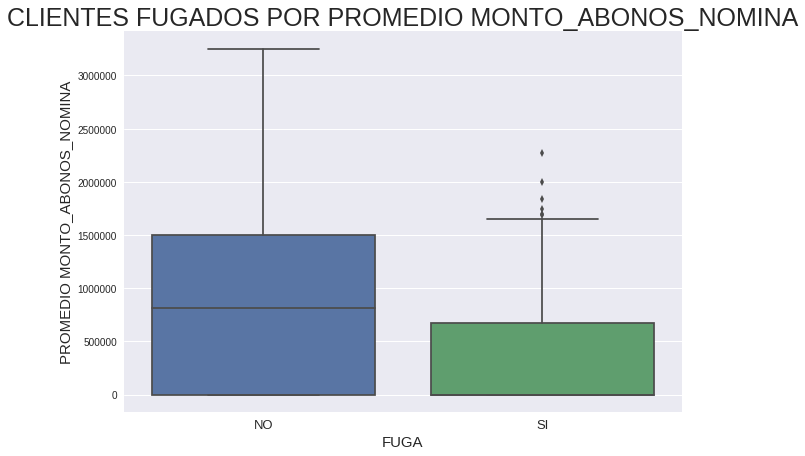

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="fuga", y="MONTO_ABONOS_NOMINA", data=cl)
ax.set_title('CLIENTES FUGADOS POR PROMEDIO MONTO_ABONOS_NOMINA', fontsize=25)
ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("FUGA", fontsize=15)
ax.set_ylabel("PROMEDIO MONTO_ABONOS_NOMINA", fontsize=15)

Tambien los clientes que más tienden a fugarse son en su mayoria los clientes que tienen montos de abonos de nomina BAJOS.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'PROMEDIO SALDO AHORROS')

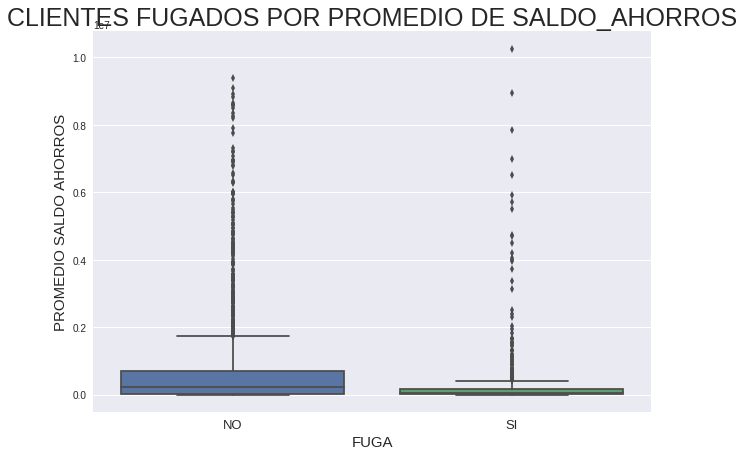

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="fuga", y="SALDO_AHORROS", data=cl)
ax.set_title('CLIENTES FUGADOS POR PROMEDIO DE SALDO_AHORROS', fontsize=25)
ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("FUGA", fontsize=15)
ax.set_ylabel("PROMEDIO SALDO AHORROS", fontsize=15)

De la misma manera que la anterior variable, los clientes que mas tienden a fugarse son los que tienen un promedio de Saldo Ahorros BAJO. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0, 0.5, 'DÍAS')

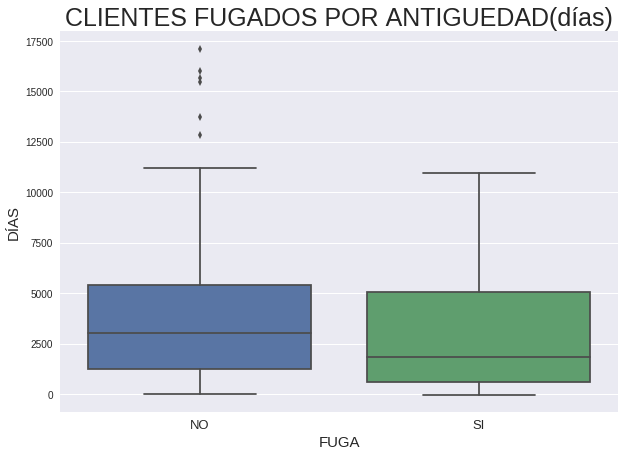

In [0]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.boxplot(x="fuga", y="ANTIGUEDAD", data=cl)
ax.set_title('CLIENTES FUGADOS POR ANTIGUEDAD(días)', fontsize=25)
ax.set_xticklabels(["NO","SI"], fontsize=13)
ax.set_xlabel("FUGA", fontsize=15)
ax.set_ylabel("DÍAS", fontsize=15)

Aunque la variable ANTIGUEDAD parece no tener mucha relevancia, en la gráfica se evidencia una tendencia a que los clientes más nuevos tienden en alguna medida a fugarse.

###MODELO DE PREDICCIÓN DE FUGA DE CLIENTES:

Con el fin de que se reduzcan las fugas de los clientes, se propone un modelo de predicción con el cual se pretende que la compañia tome medidas que disminuyan la fuga de los clientes de la manera más precisa para evitar sobrecostos en campañas  de fidelización. 


In [0]:
#Partición de la Base en train y test al 70% y 30% respectivamente:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cl.drop(['fuga'], axis=1), cl['fuga'], stratify=cl['fuga'],
                                                    test_size=0.3,random_state=19) # 70% training and 30% test

**MODELO SUPPORT VECTOR MACHINE CLASSIFIER**

In [106]:
#Entrenamiento del modelo:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
#Prueba del modelo con los datos de TEST
y_pred = clf.predict(X_test)

In [108]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7106666666666667


El modelo presenta una precisión del 71.6% para la predicción de los 

In [91]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.8308651597817616

In [112]:
metrics.confusion_matrix(y_test, y_pred)

array([[533,   0],
       [217,   0]])

Pero, para el modelo de SVM, se puede observar en la matriz de confusión que la precision del modelo no es muy buena

In [0]:
y_pred = calibrated.predict(X_test)

**MODELO DE REGRESION LOGISTICA**

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.75


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
y_pred = logreg.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[513,  20],
       [166,  51]])

**MODELO DE ARBOLES**

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.78


In [121]:
y_pred = clf.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[449,  84],
       [ 79, 138]])

**MODELO DE KVECINOS**

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.80


In [123]:
y_pred = knn.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[474,  59],
       [ 89, 128]])

En conclusión, con la ejecución de los modelos se tiene que el modelo de Kvecinos es un mejor predictor de la fuga de clientes, ya que es el que más precisión tiene con un **80% de precisión.**